In [ ]:
#!pip install missingno

## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings

## Ignore all warning messages
# warnings.filterwarnings("ignore")

In [ ]:
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

## Data Exploration

In [ ]:
## Reading the 4 csvs
historical_transactions = pd.read_csv('data/historical_transactions.csv')
merchants = pd.read_csv('data/merchants.csv')
new_merchant_transactions = pd.read_csv('data/new_merchant_transactions.csv')
userscore = pd.read_csv('data/userscore.csv')

In [ ]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
## Investigating the 4 files
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


In [ ]:
## Finding the common columns across the first 3 datasets
cols1 = set(historical_transactions.columns)
cols2 = set(merchants.columns)
cols3 = set(new_merchant_transactions.columns)
cols4 = set(userscore.columns)

# find the common columns between the first 3 datasets
common_cols = list(cols1.intersection(cols2).intersection(cols3))

# print the common columns
print(common_cols)

['city_id', 'category_1', 'subsector_id', 'merchant_id', 'category_2', 'state_id', 'merchant_category_id']


In [ ]:
## Merging the new_merchant_transactions and historical_transactions In one dataframe since
## they have the exact same columns
transactions = pd.concat([historical_transactions, new_merchant_transactions])

In [ ]:
#duplicates = transactions.duplicated().sum()

In [ ]:
#duplicates

In [ ]:
## Now we have 3 datasets [transactions, merchancts,userscore]

## idnetify the common columns between Transactions and Merchants
cols1 = set(transactions.columns)
cols2 = set(merchants.columns)
cols3 = set(userscore.columns)

# find the common columns between transactions and merchancts
common_cols = list(cols1.intersection(cols2))

# print the common columns
print(common_cols)

['city_id', 'category_1', 'subsector_id', 'merchant_id', 'category_2', 'state_id', 'merchant_category_id']


In [ ]:
# Merge the userscore and tranactions based on the card_id column [left merge to get all the rows from both of the dataframes]
# we made the merge left on usersocre as it's the dataset that containts the target label
score_and_transactions = pd.merge(userscore,transactions, on='card_id', how='left')

In [ ]:
score_and_transactions.columns

Index(['card_id', 'first_active_month', 'feature_1', 'feature_2', 'feature_3',
       'score', 'authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [ ]:
## Investigating the shapes of the original datasets
historical_transactions.shape
merchants.shape
new_merchant_transactions.shape
userscore.shape

(29112361, 14)

(334696, 22)

(1963031, 14)

(201917, 6)

In [ ]:
## Investigating the shapes of the Joined/Merged datasets
transactions.shape
score_and_transactions.shape

(31075392, 14)

(19249694, 19)

In [ ]:
## checking if the joining between score and transcations went right or not
##[expected no of rows is equal to the no pf rows of the left dataset in the merge fn.]
userscore.shape[0] == score_and_transactions.shape[0]

False

## Since the merchant datasets doesnt add much to our anaysis or our business problem which is recommending the User based on his transcations so I wouldn't merge it

# The pipeline Applied is as follow :
1. concatenating The new Transactions and The Historical Transcations in a new dataset called Transcations as they have the exact same columns
2. Mergeing the Userscore and Transactions on the column 'Card_id' as it's considred Primary_key in the userscore Dataframe and a foreign key in thee Transcations dataframe
3. Not to use Merchant dataset since it won't contribute much in predicting the loyality of the customers

## missing values anaylsis

In [ ]:
# Calculating the percentage of missing values for each column
missing_percent = round(score_and_transactions.isnull().sum() / len(score_and_transactions) * 100, 2).sort_values(ascending=False)
missing_percent

category_2              8.86
category_3              0.75
merchant_id             0.53
card_id                 0.00
state_id                0.00
purchase_date           0.00
purchase_amount         0.00
month_lag               0.00
merchant_category_id    0.00
installments            0.00
first_active_month      0.00
category_1              0.00
city_id                 0.00
authorized_flag         0.00
score                   0.00
feature_3               0.00
feature_2               0.00
feature_1               0.00
subsector_id            0.00
dtype: float64

<Axes: >

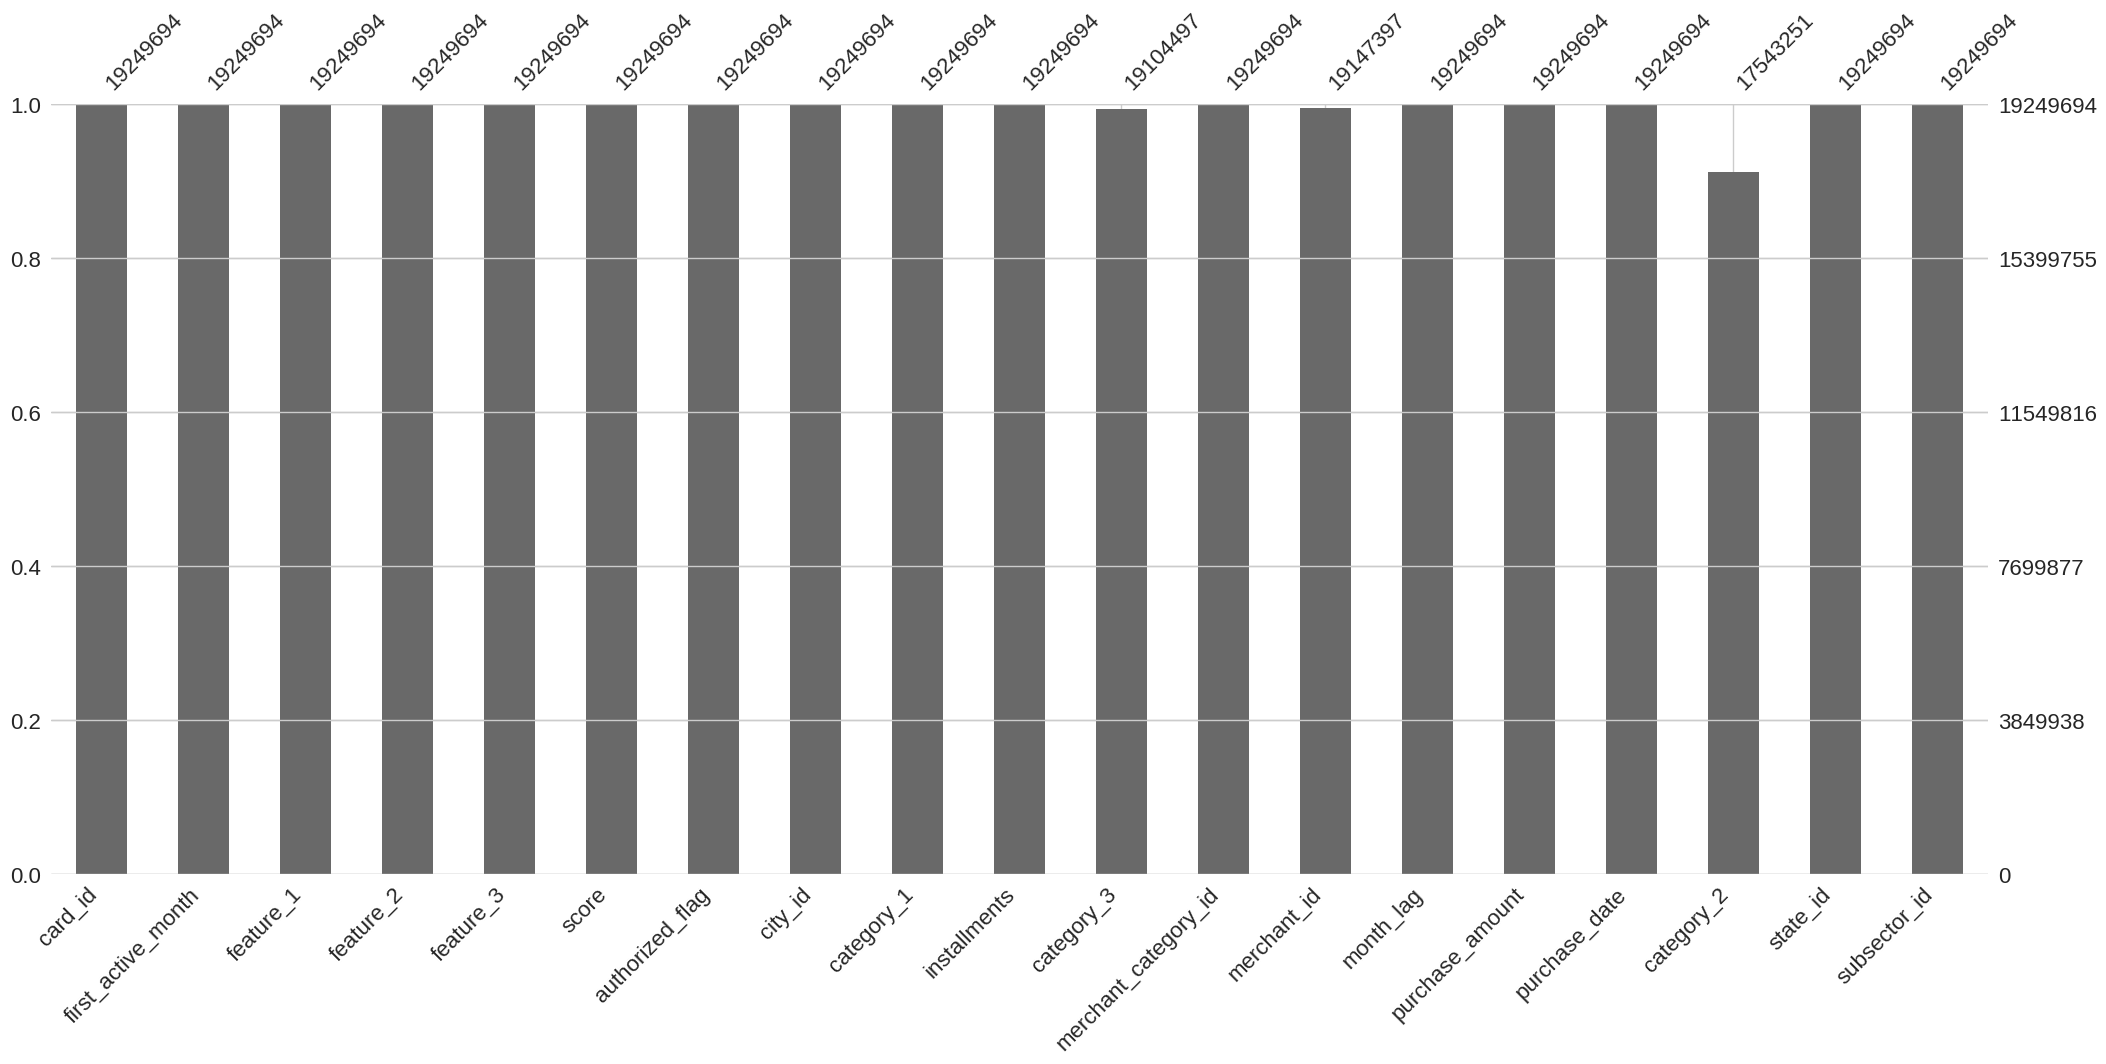

In [ ]:
# visaulizing the Null values by the msno bar
msno.bar(score_and_transactions)

<Axes: >

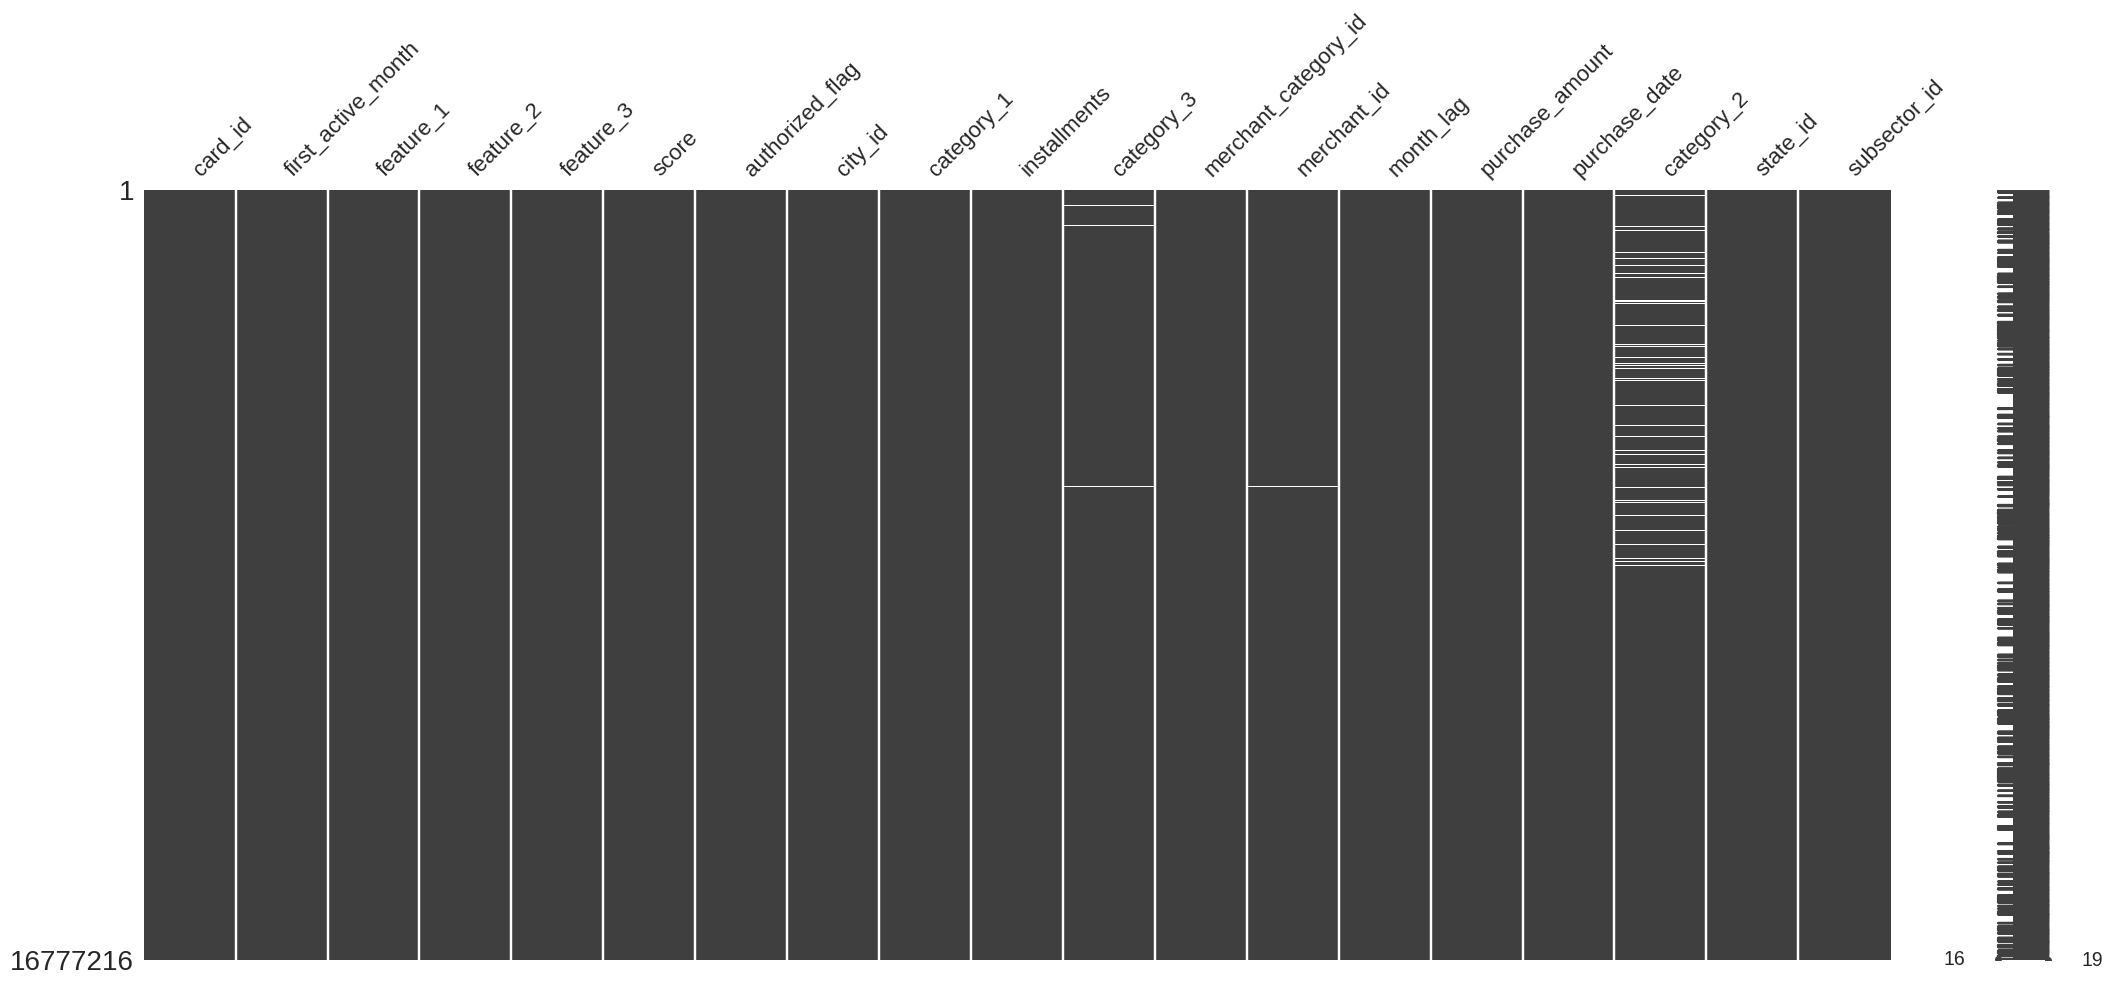

In [ ]:
## In order to get a better insight about the postion of the missing values we use the missingno matrix

# Downsample data to a random subset of 2**24 rows
score_and_transactions_sample = score_and_transactions.sample(n=2**24)

msno.matrix(score_and_transactions_sample)

<Axes: >

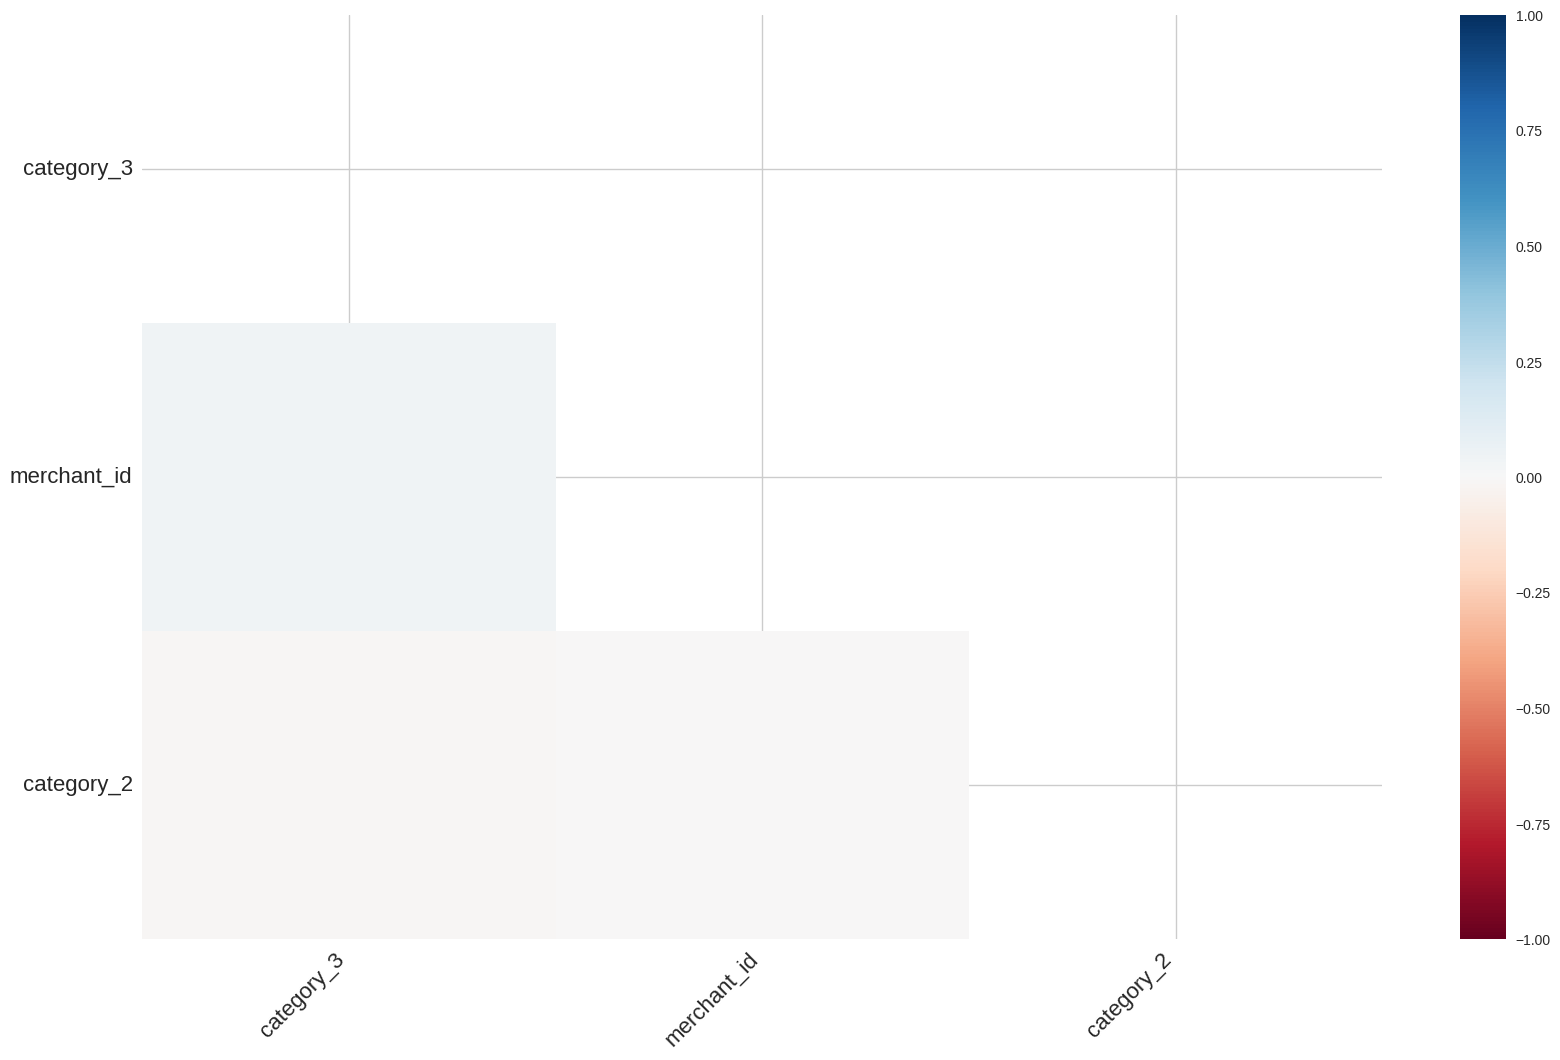

In [ ]:
## checking the realation between missing values
msno.heatmap(score_and_transactions)

## from the previous visalization and anylsis we get to know the following
1. we have only 3 features that has missing values which are [category_2, category_3, merchant_id]
2. The missing values pattern is General pattern
3. Since there is No string correlation between the features so we realise that the missing value mechanisim is MCAR

## Handling the Missing Values

In [ ]:
mssng_cols = score_and_transactions[['category_2', 'category_3', 'merchant_id']]


In [ ]:
## getting the number of unique values in each of them
unique_counts = mssng_cols.nunique()
unique_counts

category_2          5
category_3          3
merchant_id    313541
dtype: int64

In [ ]:
## getting the value counts in each of them
value_counts_ct_2 = score_and_transactions['category_2'].value_counts(normalize=True)
value_counts_ct_3 = score_and_transactions['category_3'].value_counts(normalize=True)
value_counts_mId = score_and_transactions['merchant_id'].value_counts(normalize=True)

value_counts_ct_2
value_counts_ct_3
value_counts_mId

category_2
1.0    0.574451
3.0    0.148511
5.0    0.139945
4.0    0.098540
2.0    0.038552
Name: proportion, dtype: float64

category_3
A    0.529983
B    0.405261
C    0.064755
Name: proportion, dtype: float64

merchant_id
M_ID_00a6ca8a8a    3.681691e-02
M_ID_e5374dabc0    1.398044e-02
M_ID_9139332ccc    1.218563e-02
M_ID_50f575c681    6.396274e-03
M_ID_fc7d7969c3    5.858551e-03
                       ...     
M_ID_e70c29ca35    5.222642e-08
M_ID_62c3eb88bf    5.222642e-08
M_ID_a51f6efd06    5.222642e-08
M_ID_eb22a05f79    5.222642e-08
M_ID_fac1c06f2d    5.222642e-08
Name: proportion, Length: 313541, dtype: float64

## I would handle the missing values by doing the Following
1. For Category 2 column ==> impute the missing values by the most frequent which is 1.0
2. For Category 3 column ==> impute the missing values by the most frequent which is A
3. For MerchantID column ==> Dropping Column itself

In [ ]:
# Impute missing values with mode
score_and_transactions['category_2'].fillna(score_and_transactions['category_2'].mode()[0], inplace=True)
score_and_transactions['category_3'].fillna(score_and_transactions['category_3'].mode()[0], inplace=True)

In [ ]:
# Dropping the Merchant_Id column
score_and_transactions.drop('merchant_id', axis=1, inplace=True)

In [ ]:
## CHecking one more time for the Nulls
missing_percent = round(score_and_transactions.isnull().sum() / len(score_and_transactions) * 100, 2).sort_values(ascending=False)
missing_percent

card_id                 0.0
first_active_month      0.0
state_id                0.0
category_2              0.0
purchase_date           0.0
purchase_amount         0.0
month_lag               0.0
merchant_category_id    0.0
category_3              0.0
installments            0.0
category_1              0.0
city_id                 0.0
authorized_flag         0.0
score                   0.0
feature_3               0.0
feature_2               0.0
feature_1               0.0
subsector_id            0.0
dtype: float64

## Consistency and Noise analysis

In [ ]:
## checking the Datatypes of features
score_and_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19249694 entries, 0 to 19249693
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   card_id               object 
 1   first_active_month    object 
 2   feature_1             int64  
 3   feature_2             int64  
 4   feature_3             int64  
 5   score                 float64
 6   authorized_flag       object 
 7   city_id               int64  
 8   category_1            object 
 9   installments          int64  
 10  category_3            object 
 11  merchant_category_id  int64  
 12  month_lag             int64  
 13  purchase_amount       float64
 14  purchase_date         object 
 15  category_2            float64
 16  state_id              int64  
 17  subsector_id          int64  
dtypes: float64(3), int64(9), object(6)
memory usage: 2.6+ GB


In [ ]:
## checking the value counts for the categorical features "Less frequant values could be conisdred as a noise"
# Define a list of categorical column names
cat_cols = ['city_id', 'state_id', 'merchant_category_id', 'subsector_id', 'category_1', 'category_2', 'authorized_flag']

# Loop through each categorical column and print the value counts
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(score_and_transactions[col].value_counts())
    print()

Value counts for city_id:
city_id
 69     3204131
-1      1590039
 19      756226
 158     739454
 17      630301
         ...   
 319       1187
 92         618
 273        430
 316         96
 185         41
Name: count, Length: 308, dtype: int64

Value counts for state_id:
state_id
 9     7016420
-1     1706443
 16    1420028
 15    1380842
 5     1091804
 19     796926
 20     738231
 22     630301
 21     625060
 4      563626
 11     427619
 7      423229
 13     419758
 3      360823
 12     260447
 18     257869
 2      249515
 1      166449
 10     144254
 24     136919
 23     132816
 14     115031
 8      103805
 17      77008
 6        4471
Name: count, dtype: int64

Value counts for merchant_category_id:
merchant_category_id
705    3546612
307    2015186
278    1496731
80     1282568
367    1068079
        ...   
882          1
164          1
311          1
86           1
875          1
Name: count, Length: 325, dtype: int64

Value counts for subsector_id:
subsector_id
 33

In [ ]:
score_and_transactions.tail(10)

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
19249684,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,-1,Y,1,B,561,-1,-0.701979,2018-01-02 21:39:46,1.0,-1,7
19249685,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,N,-1,Y,1,B,224,-3,-0.596643,2017-11-13 14:22:23,1.0,-1,11
19249686,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,B,80,1,-0.721363,2018-03-24 10:19:09,3.0,7,37
19249687,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,3,C,884,1,0.162196,2018-03-22 20:17:56,3.0,7,27
19249688,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,B,278,1,-0.712197,2018-03-25 21:57:27,3.0,7,37
19249689,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,B,705,2,-0.664878,2018-04-30 14:04:26,3.0,7,33
19249690,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,-1,A,884,2,-0.326316,2018-04-27 15:11:46,3.0,7,27
19249691,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,-1,A,506,1,0.081323,2018-03-25 12:11:27,3.0,7,30
19249692,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,B,278,2,-0.664262,2018-04-29 12:26:30,3.0,7,37
19249693,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,B,454,2,-0.734887,2018-04-24 12:12:09,3.0,7,39


###  From the previous we found that we have -1 values in [city_id, state_id ,subsector_id ] which indicate unkown values and i assume that the postion doesn't affect the loyalty score so we don't need to handle them

In [ ]:
## checking the outliers in the Target col
# Extract score
score = score_and_transactions['score']

# Print the summary
print(score.describe())

count    1.924969e+07
mean    -4.555357e-01
std      3.581071e+00
min     -3.321928e+01
25%     -8.080842e-01
50%     -9.017618e-02
75%      5.422310e-01
max      1.796507e+01
Name: score, dtype: float64


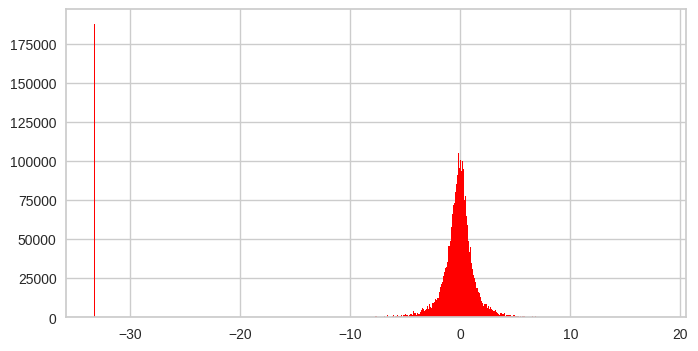

In [ ]:
## plotting a histogram
# Find the square root of the length of scores
n_bins = np.sqrt(len(score))

# Cast to an integer
n_bins = int(n_bins)

plt.figure(figsize=(8, 4))

# Create a histogram
plt.hist(score, bins=n_bins, color='red')
plt.show();

<Figure size 1600x800 with 0 Axes>

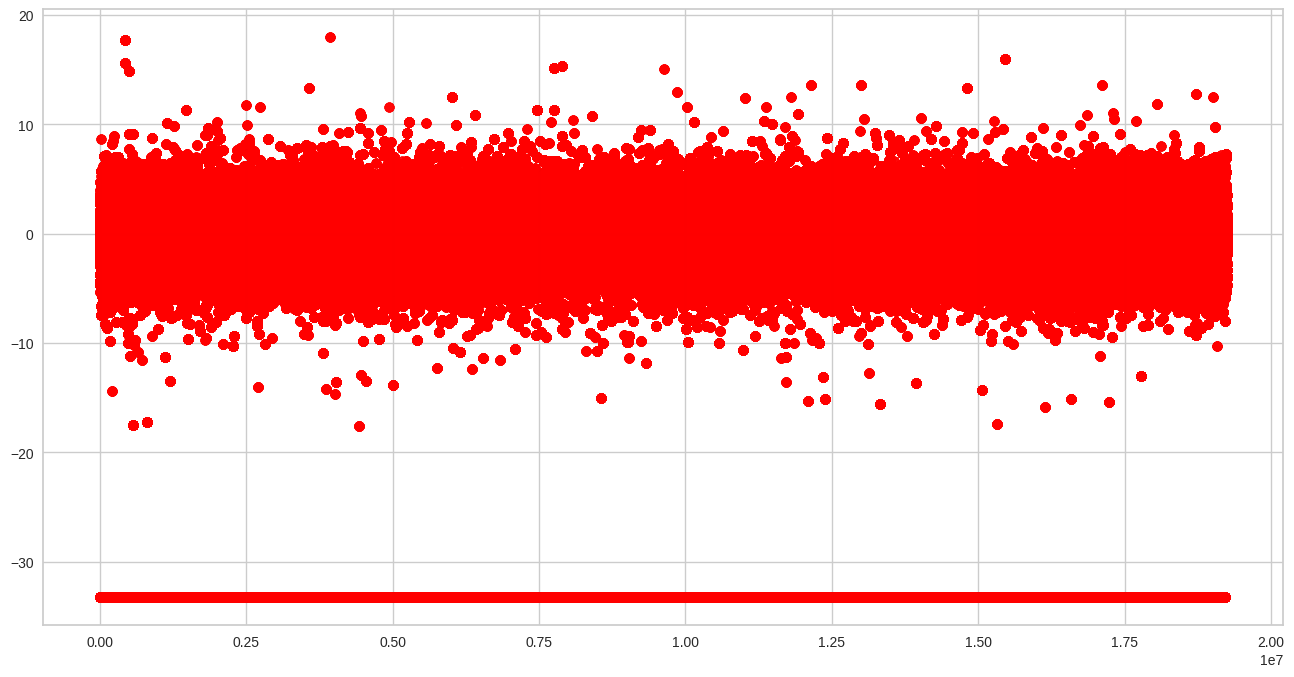

In [ ]:
## plotting the outlier against the constinous distn. in a scatter plot

# Create a list of consecutive integers
integers = range(len(score))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,score, c='red', alpha=0.5)
plt.show()

## From the previous graphs it's abvious that there is a noise for the values [outliers] at the range below -30

In [ ]:
## removing the outliers from the Traget column

# boolean mask to select only the rows that doesn't have values below -30
mask = score_and_transactions['score'] >= -30

# remove The outliers rows
data_no = score_and_transactions[mask]

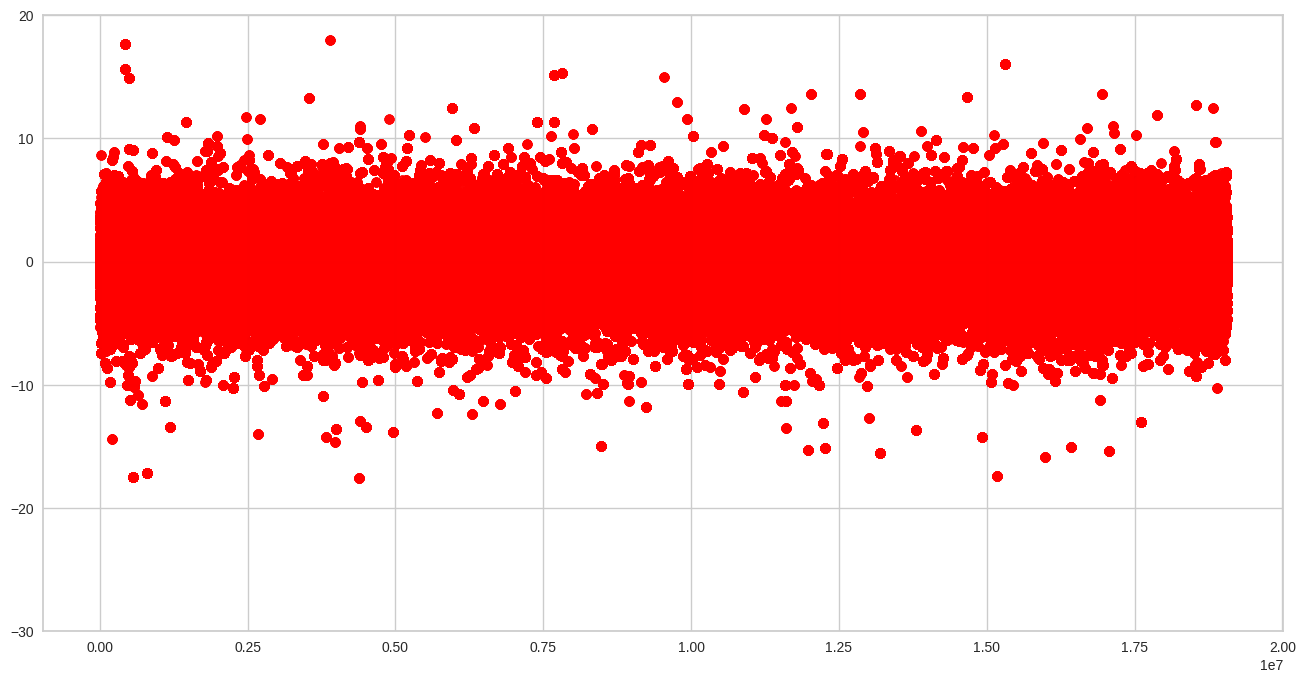

In [ ]:
## plotting the outlier against the constinous distn. in a scatter plot again to check

score = data_no['score']
# Create a list of consecutive integers
integers = range(len(score))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,score, c='red', alpha = 0.5)


# set the limits of the x and y axes
plt.ylim(-30,20)

plt.show();

In [ ]:
data_no.shape
score_and_transactions.shape

(19062128, 18)

(19249694, 18)

## SO we Finally Removed The outliers Successfully from the Target Column :D

# Statistics and Hypothesis Test

## in order to Report important statistics in preprocessed data i would do the following
1. calculating Mean and STD for user loyality score
2. Finding the Minimum and maximum user loyalty score
3. Finding the Correlation between the user loyalty score and other variables
4. Finding Median and quartiles of the user loyalty score


In [ ]:
## Finding Mean, STD , Min , Max
data_no['score'].describe(percentiles=[.5]).loc[['mean','std', 'min', 'max']]

mean    -0.133150
std      1.511208
min    -17.608147
max     17.965068
Name: score, dtype: float64

In [ ]:
# Finding median and quartiles of the user loyalty score
median = data_no['score'].median()
q1_score, q3_score = np.percentile(data_no['score'], [25, 75])

median , q1_score , q3_score

(-0.07862818, -0.77873809, 0.55076122)

<Axes: >

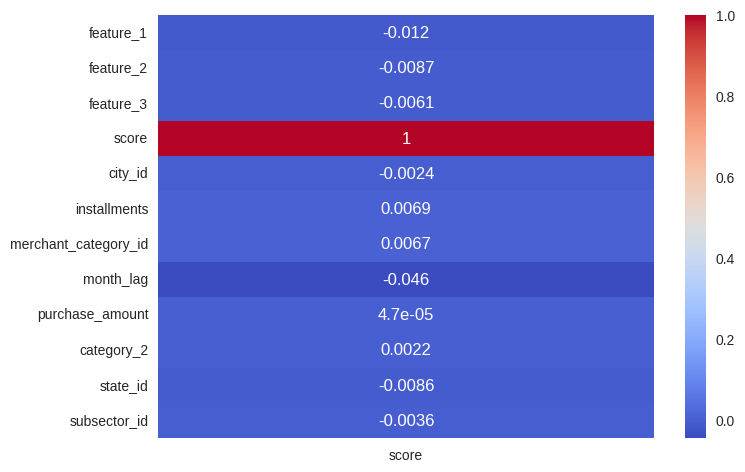

In [ ]:
# correlation between the loyalty score and other Numeric variables
numerical_columns = data_no.select_dtypes(include=[np.number, 'bool']).columns.tolist()
correlations = data_no[numerical_columns].corr()['score']

# Create a heatmap of the correlation matrix
sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True)


# Show the plot
plt.show()

In [ ]:
correlations.sort_values(ascending=False)

score                   1.000000
installments            0.006885
merchant_category_id    0.006660
category_2              0.002153
purchase_amount         0.000047
city_id                -0.002433
subsector_id           -0.003615
feature_3              -0.006089
state_id               -0.008648
feature_2              -0.008661
feature_1              -0.012469
month_lag              -0.045846
Name: score, dtype: float64

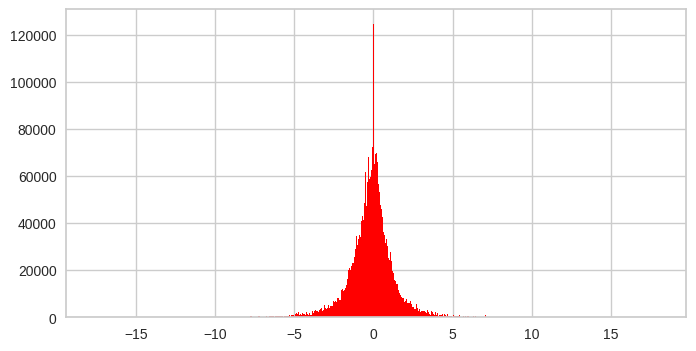

In [ ]:
## plotting a histogram to see the distribution of the data
# Find the square root of the length of scores
score= data_no['score']
n_bins = np.sqrt(len(score))

# Cast to an integer
n_bins = int(n_bins)

plt.figure(figsize=(8, 4))

# Create a histogram
plt.hist(score, bins=n_bins, color='red')
plt.show();

## Aggregations and some data cleaning

**Before answering further questions, Lets work on the data more and do some aggregations so it would be easier to handel later.**

In [ ]:
# investigating the data in order to come up with two Hypothsis testing
data_no.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,A,195,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,A,278,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,A,683,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,A,309,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,A,278,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37


In [ ]:
cols = {'feature_1', 'feature_2', 'feature_3', 'category_2', 'authorized_flag'}
for col in cols:
    print(data_no[col].value_counts())
    print()


authorized_flag
Y    17528389
N     1533739
Name: count, dtype: int64

feature_2
2    8197800
1    7890346
3    2973982
Name: count, dtype: int64

feature_3
1    10521880
0     8540248
Name: count, dtype: int64

feature_1
3    6308289
2    4592398
5    4213591
4    2138191
1    1809659
Name: count, dtype: int64

category_2
1.0    11659776
3.0     2584189
5.0     2438546
4.0     1710353
2.0      669264
Name: count, dtype: int64



In [ ]:
## Creating some Aggreations in order to get the best from the data

# Group the data by card id and aggregate the sum of installments and the average score
#card_data = data_no.groupby('card_id')['installments'].sum()
#card_data

card_data = data_no.groupby('card_id')['purchase_amount'].agg(['min', 'max', 'mean']).reset_index()
card_data.columns = ['card_id','min_purchase_amount', 'max_purchase_amount', 'mean_purchase_amount']

In [ ]:
card_data

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084
...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633


In [ ]:
# Group the data by card id and category, and count the number of occurrences of each category value
card_data2 = data_no.groupby(['card_id', 'category_3'])['category_3'].size().unstack(fill_value=0)

# Display the resulting DataFrame
print(card_data2)

category_3         A    B   C
card_id                      
C_ID_00007093c1    0  127  24
C_ID_0001506ef0   67    1   0
C_ID_000183fdda    5  109  41
C_ID_00027503e2   42    0   0
C_ID_0002c7c2c1   73    0   0
...              ...  ...  ..
C_ID_fffeced303    2  179   9
C_ID_fffeed3a89    7  191  21
C_ID_ffff579d3a  112    3   0
C_ID_ffff828181    2  173  23
C_ID_fffffd5772    1   82   4

[199710 rows x 3 columns]


In [ ]:
# Group the data by card id and category, and count the number of occurrences of each category value
card_data3 = data_no.groupby(['card_id', 'category_1'])['category_1'].size().unstack(fill_value=0)

# Display the resulting DataFrame
print(card_data3)

category_1         N    Y
card_id                  
C_ID_00007093c1  123   28
C_ID_0001506ef0   68    0
C_ID_000183fdda  151    4
C_ID_00027503e2   42    0
C_ID_0002c7c2c1   73    0
...              ...  ...
C_ID_fffeced303   52  138
C_ID_fffeed3a89  202   17
C_ID_ffff579d3a  115    0
C_ID_ffff828181  187   11
C_ID_fffffd5772   54   33

[199710 rows x 2 columns]


In [ ]:
card_data_final = pd.merge(pd.merge(card_data, card_data2, on='card_id'), card_data3, on='card_id')
card_data_final

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,A,B,C,N,Y
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0
...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11


In [ ]:
Id_and_score = data_no[['score','card_id']]
Id_and_score

,score,card_id
0,-0.820283,C_ID_92a2005557
1,-0.820283,C_ID_92a2005557
2,-0.820283,C_ID_92a2005557
3,-0.820283,C_ID_92a2005557
4,-0.820283,C_ID_92a2005557
...,...,...
19249689,-1.859413,C_ID_92c9984c58
19249690,-1.859413,C_ID_92c9984c58
19249691,-1.859413,C_ID_92c9984c58
19249692,-1.859413,C_ID_92c9984c58


In [ ]:
card_data_final2 = pd.merge(card_data_final,Id_and_score, on='card_id')

In [ ]:
card_data_final2

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,A,B,C,N,Y,score
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077
1,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077
2,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077
3,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077
4,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077
...,...,...,...,...,...,...,...,...,...,...
19062123,C_ID_fffffd5772,-0.745405,-0.311139,-0.691503,1,82,4,54,33,-1.073077
19062124,C_ID_fffffd5772,-0.745405,-0.311139,-0.691503,1,82,4,54,33,-1.073077
19062125,C_ID_fffffd5772,-0.745405,-0.311139,-0.691503,1,82,4,54,33,-1.073077
19062126,C_ID_fffffd5772,-0.745405,-0.311139,-0.691503,1,82,4,54,33,-1.073077


In [ ]:
card_data_final2['card_id'].nunique()

199710

In [ ]:
card_data_final2.duplicated().sum()

18862418

In [ ]:
## Finding the Number of transctions for each card
card_counts = card_data_final2.groupby('card_id').size()

## making a dataframe for THe number of transactions per each card
Transactions_count = pd.DataFrame({'card_id': card_counts.index, 'number of transactions': card_counts.values})

Transactions_count

,card_id,number of transactions
0,C_ID_00007093c1,151
1,C_ID_0001506ef0,68
2,C_ID_000183fdda,155
3,C_ID_00027503e2,42
4,C_ID_0002c7c2c1,73
...,...,...
199705,C_ID_fffeced303,190
199706,C_ID_fffeed3a89,219
199707,C_ID_ffff579d3a,115
199708,C_ID_ffff828181,198


In [ ]:
## removing the duplicates based on card ID
card_data_final2 = card_data_final2.drop_duplicates(subset='card_id')

In [ ]:
## merging the number of transactions with the rest of data
card_data_final3 = pd.merge(card_data_final2,Transactions_count, on='card_id')

In [ ]:
card_data_final3

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,A,B,C,N,Y,score,number of transactions
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73
...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198


In [ ]:
card_feature1_mean = data_no.groupby('card_id')['feature_1'].mean()
card_feature1_mean

card_id
C_ID_00007093c1    5.0
C_ID_0001506ef0    2.0
C_ID_000183fdda    4.0
C_ID_00027503e2    3.0
C_ID_0002c7c2c1    3.0
                  ... 
C_ID_fffeced303    2.0
C_ID_fffeed3a89    4.0
C_ID_ffff579d3a    2.0
C_ID_ffff828181    2.0
C_ID_fffffd5772    2.0
Name: feature_1, Length: 199710, dtype: float64

In [ ]:
card_feature2_mean = data_no.groupby('card_id')['feature_2'].mean()
card_feature2_mean

card_id
C_ID_00007093c1    1.0
C_ID_0001506ef0    2.0
C_ID_000183fdda    1.0
C_ID_00027503e2    1.0
C_ID_0002c7c2c1    2.0
                  ... 
C_ID_fffeced303    1.0
C_ID_fffeed3a89    3.0
C_ID_ffff579d3a    2.0
C_ID_ffff828181    1.0
C_ID_fffffd5772    1.0
Name: feature_2, Length: 199710, dtype: float64

In [ ]:
card_feature3_mean = data_no.groupby('card_id')['feature_3'].mean()
card_feature3_mean

card_id
C_ID_00007093c1    1.0
C_ID_0001506ef0    0.0
C_ID_000183fdda    0.0
C_ID_00027503e2    1.0
C_ID_0002c7c2c1    1.0
                  ... 
C_ID_fffeced303    0.0
C_ID_fffeed3a89    0.0
C_ID_ffff579d3a    0.0
C_ID_ffff828181    0.0
C_ID_fffffd5772    0.0
Name: feature_3, Length: 199710, dtype: float64

In [ ]:
# Group the data by card id and category, and count the number of occurrences of each category value
auth_flag = data_no.groupby(['card_id', 'authorized_flag'])['authorized_flag'].size().unstack(fill_value=0)
auth_flag

authorized_flag,N,Y
card_id,,
C_ID_00007093c1,35,116
C_ID_0001506ef0,4,64
C_ID_000183fdda,7,148
C_ID_00027503e2,18,24
C_ID_0002c7c2c1,9,64
...,...,...
C_ID_fffeced303,22,168
C_ID_fffeed3a89,3,216
C_ID_ffff579d3a,15,100


In [ ]:
## merging the new features
features_123 = pd.merge(pd.merge(card_feature1_mean, card_feature2_mean, on='card_id'), card_feature3_mean, on='card_id')
features_123

,feature_1,feature_2,feature_3
card_id,,,
C_ID_00007093c1,5.0,1.0,1.0
C_ID_0001506ef0,2.0,2.0,0.0
C_ID_000183fdda,4.0,1.0,0.0
C_ID_00027503e2,3.0,1.0,1.0
C_ID_0002c7c2c1,3.0,2.0,1.0
...,...,...,...
C_ID_fffeced303,2.0,1.0,0.0
C_ID_fffeed3a89,4.0,3.0,0.0
C_ID_ffff579d3a,2.0,2.0,0.0


In [ ]:
features_n_all =pd.merge(features_123, auth_flag, on='card_id')
features_n_all

,feature_1,feature_2,feature_3,N,Y
card_id,,,,,
C_ID_00007093c1,5.0,1.0,1.0,35,116
C_ID_0001506ef0,2.0,2.0,0.0,4,64
C_ID_000183fdda,4.0,1.0,0.0,7,148
C_ID_00027503e2,3.0,1.0,1.0,18,24
C_ID_0002c7c2c1,3.0,2.0,1.0,9,64
...,...,...,...,...,...
C_ID_fffeced303,2.0,1.0,0.0,22,168
C_ID_fffeed3a89,4.0,3.0,0.0,3,216
C_ID_ffff579d3a,2.0,2.0,0.0,15,100


In [ ]:
## merging all together
card_data_final5 = pd.DataFrame(pd.merge(card_data_final3,features_n_all, on='card_id'))
card_data_final5

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,A,B,C,N_x,Y_x,score,number of transactions,feature_1,feature_2,feature_3,N_y,Y_y
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151,5.0,1.0,1.0,35,116
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68,2.0,2.0,0.0,4,64
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155,4.0,1.0,0.0,7,148
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42,3.0,1.0,1.0,18,24
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73,3.0,2.0,1.0,9,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190,2.0,1.0,0.0,22,168
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219,4.0,3.0,0.0,3,216
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115,2.0,2.0,0.0,15,100
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198,2.0,1.0,0.0,24,174


In [ ]:
## adjusting the df columns names
cols = ['card_id', 'min_purchase_amount','max_purchase_amount','mean_purchase_amount', 'Category_3_A', 'Category_3_B', 'Category_3_C', 'Category_1_N', 'Category_1_Y','score' ,
        'number of transactions', 'feature_1', 'feature_2', 'feature_3', 'authorized_flag_N' , 'authorized_flag_Y']
#card_data_final5= card_data_final5.columns=cols
card_data_final5_df= card_data_final5.set_axis(cols, axis=1)
card_data_final5_df

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,number of transactions,feature_1,feature_2,feature_3,authorized_flag_N,authorized_flag_Y
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151,5.0,1.0,1.0,35,116
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68,2.0,2.0,0.0,4,64
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155,4.0,1.0,0.0,7,148
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42,3.0,1.0,1.0,18,24
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73,3.0,2.0,1.0,9,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190,2.0,1.0,0.0,22,168
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219,4.0,3.0,0.0,3,216
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115,2.0,2.0,0.0,15,100
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198,2.0,1.0,0.0,24,174


In [ ]:
import datetime
## Trying to calculate the offset in months from the first_active_month
#converting first active month to date
data_no.loc[:, 'first_active_month'] = pd.to_datetime(data_no['first_active_month'],format ='%b-%y')


In [ ]:
active_date = data_no.groupby('card_id')['first_active_month'].min()
pd.DataFrame(active_date , columns= ['card_id','active_date'])
active_date

,card_id,active_date


card_id
C_ID_00007093c1    2017-02-01 00:00:00
C_ID_0001506ef0    2016-07-01 00:00:00
C_ID_000183fdda    2017-09-01 00:00:00
C_ID_00027503e2    2017-05-01 00:00:00
C_ID_0002c7c2c1    2017-04-01 00:00:00
                          ...         
C_ID_fffeced303    2017-04-01 00:00:00
C_ID_fffeed3a89    2017-11-01 00:00:00
C_ID_ffff579d3a    2017-08-01 00:00:00
C_ID_ffff828181    2015-01-01 00:00:00
C_ID_fffffd5772    2017-08-01 00:00:00
Name: first_active_month, Length: 199710, dtype: object

In [ ]:
#merging the last purchase date with the rest of dataframe
card_data_temp =card_data_final5_df.copy()
card_data_temp = pd.merge(card_data_temp,active_date, on='card_id')
card_data_temp

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,number of transactions,feature_1,feature_2,feature_3,authorized_flag_N,authorized_flag_Y,first_active_month
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151,5.0,1.0,1.0,35,116,2017-02-01 00:00:00
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68,2.0,2.0,0.0,4,64,2016-07-01 00:00:00
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155,4.0,1.0,0.0,7,148,2017-09-01 00:00:00
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42,3.0,1.0,1.0,18,24,2017-05-01 00:00:00
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73,3.0,2.0,1.0,9,64,2017-04-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190,2.0,1.0,0.0,22,168,2017-04-01 00:00:00
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219,4.0,3.0,0.0,3,216,2017-11-01 00:00:00
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115,2.0,2.0,0.0,15,100,2017-08-01 00:00:00
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198,2.0,1.0,0.0,24,174,2015-01-01 00:00:00


In [ ]:
pd.DataFrame(card_data_temp)
card_data_temp['first_active_month'] = pd.to_datetime(card_data_temp['first_active_month'])
card_data_temp['active_month'] = card_data_temp['first_active_month'].dt.month
card_data_temp['active_year'] = card_data_temp['first_active_month'].dt.year
card_data_temp

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,number of transactions,feature_1,feature_2,feature_3,authorized_flag_N,authorized_flag_Y,first_active_month
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151,5.0,1.0,1.0,35,116,2017-02-01 00:00:00
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68,2.0,2.0,0.0,4,64,2016-07-01 00:00:00
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155,4.0,1.0,0.0,7,148,2017-09-01 00:00:00
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42,3.0,1.0,1.0,18,24,2017-05-01 00:00:00
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73,3.0,2.0,1.0,9,64,2017-04-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190,2.0,1.0,0.0,22,168,2017-04-01 00:00:00
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219,4.0,3.0,0.0,3,216,2017-11-01 00:00:00
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115,2.0,2.0,0.0,15,100,2017-08-01 00:00:00
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198,2.0,1.0,0.0,24,174,2015-01-01 00:00:00


,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,number of transactions,feature_1,feature_2,feature_3,authorized_flag_N,authorized_flag_Y,first_active_month,active_month,active_year
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,151,5.0,1.0,1.0,35,116,2017-02-01,2,2017
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,68,2.0,2.0,0.0,4,64,2016-07-01,7,2016
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,155,4.0,1.0,0.0,7,148,2017-09-01,9,2017
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,42,3.0,1.0,1.0,18,24,2017-05-01,5,2017
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,73,3.0,2.0,1.0,9,64,2017-04-01,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,190,2.0,1.0,0.0,22,168,2017-04-01,4,2017
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,219,4.0,3.0,0.0,3,216,2017-11-01,11,2017
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,115,2.0,2.0,0.0,15,100,2017-08-01,8,2017
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,198,2.0,1.0,0.0,24,174,2015-01-01,1,2015


In [ ]:
data_no

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,C_ID_92a2005557,2017-06-01 00:00:00,5,2,1,-0.820283,Y,69,N,0,A,195,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,C_ID_92a2005557,2017-06-01 00:00:00,5,2,1,-0.820283,Y,69,N,0,A,278,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,C_ID_92a2005557,2017-06-01 00:00:00,5,2,1,-0.820283,Y,69,N,0,A,683,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,C_ID_92a2005557,2017-06-01 00:00:00,5,2,1,-0.820283,Y,69,N,0,A,309,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,C_ID_92a2005557,2017-06-01 00:00:00,5,2,1,-0.820283,Y,69,N,0,A,278,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249689,C_ID_92c9984c58,2017-07-01 00:00:00,3,1,1,-1.859413,Y,25,N,1,B,705,2,-0.664878,2018-04-30 14:04:26,3.0,7,33
19249690,C_ID_92c9984c58,2017-07-01 00:00:00,3,1,1,-1.859413,Y,25,N,-1,A,884,2,-0.326316,2018-04-27 15:11:46,3.0,7,27
19249691,C_ID_92c9984c58,2017-07-01 00:00:00,3,1,1,-1.859413,Y,25,N,-1,A,506,1,0.081323,2018-03-25 12:11:27,3.0,7,30
19249692,C_ID_92c9984c58,2017-07-01 00:00:00,3,1,1,-1.859413,Y,25,N,1,B,278,2,-0.664262,2018-04-29 12:26:30,3.0,7,37


In [ ]:
last_purchase_date = data_no.groupby('card_id')['purchase_date'].max().to_frame().reset_index()
last_purchase_date.columns = ['card_id', 'last_purchase_date']
last_purchase_date.head()

,card_id,last_purchase_date
0,C_ID_00007093c1,2018-04-09 16:23:59
1,C_ID_0001506ef0,2018-03-22 09:14:30
2,C_ID_000183fdda,2018-04-30 14:59:53
3,C_ID_00027503e2,2018-01-19 12:07:27
4,C_ID_0002c7c2c1,2018-03-24 08:43:37


In [ ]:
last_purchase_date['last_purchase_date'] = pd.to_datetime(last_purchase_date['last_purchase_date'])
last_purchase_date['purchase_month'] = last_purchase_date['last_purchase_date'].dt.month
last_purchase_date['purchase_year'] = last_purchase_date['last_purchase_date'].dt.year
last_purchase_date

,card_id,last_purchase_date,purchase_month,purchase_year
0,C_ID_00007093c1,2018-04-09 16:23:59,4,2018
1,C_ID_0001506ef0,2018-03-22 09:14:30,3,2018
2,C_ID_000183fdda,2018-04-30 14:59:53,4,2018
3,C_ID_00027503e2,2018-01-19 12:07:27,1,2018
4,C_ID_0002c7c2c1,2018-03-24 08:43:37,3,2018
...,...,...,...,...
199705,C_ID_fffeced303,2018-04-27 14:54:08,4,2018
199706,C_ID_fffeed3a89,2018-04-30 20:26:40,4,2018
199707,C_ID_ffff579d3a,2018-03-21 08:55:34,3,2018
199708,C_ID_ffff828181,2018-04-29 18:59:29,4,2018


In [ ]:
#merging the last purchase date with the rest of dataframe
card_data_final6_df = pd.merge(card_data_temp,last_purchase_date, on='card_id')
card_data_final6_df

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,...,feature_2,feature_3,authorized_flag_N,authorized_flag_Y,first_active_month,active_month,active_year,last_purchase_date,purchase_month,purchase_year
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,...,1.0,1.0,35,116,2017-02-01,2,2017,2018-04-09 16:23:59,4,2018
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,...,2.0,0.0,4,64,2016-07-01,7,2016,2018-03-22 09:14:30,3,2018
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,...,1.0,0.0,7,148,2017-09-01,9,2017,2018-04-30 14:59:53,4,2018
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,...,1.0,1.0,18,24,2017-05-01,5,2017,2018-01-19 12:07:27,1,2018
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,...,2.0,1.0,9,64,2017-04-01,4,2017,2018-03-24 08:43:37,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,...,1.0,0.0,22,168,2017-04-01,4,2017,2018-04-27 14:54:08,4,2018
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,...,3.0,0.0,3,216,2017-11-01,11,2017,2018-04-30 20:26:40,4,2018
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,...,2.0,0.0,15,100,2017-08-01,8,2017,2018-03-21 08:55:34,3,2018
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,...,1.0,0.0,24,174,2015-01-01,1,2015,2018-04-29 18:59:29,4,2018


In [ ]:
card_data_final6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199710 entries, 0 to 199709
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   card_id                 199710 non-null  object        
 1   min_purchase_amount     199710 non-null  float64       
 2   max_purchase_amount     199710 non-null  float64       
 3   mean_purchase_amount    199710 non-null  float64       
 4   Category_3_A            199710 non-null  int64         
 5   Category_3_B            199710 non-null  int64         
 6   Category_3_C            199710 non-null  int64         
 7   Category_1_N            199710 non-null  int64         
 8   Category_1_Y            199710 non-null  int64         
 9   score                   199710 non-null  float64       
 10  number of transactions  199710 non-null  int64         
 11  feature_1               199710 non-null  float64       
 12  feature_2               199710

<Axes: >

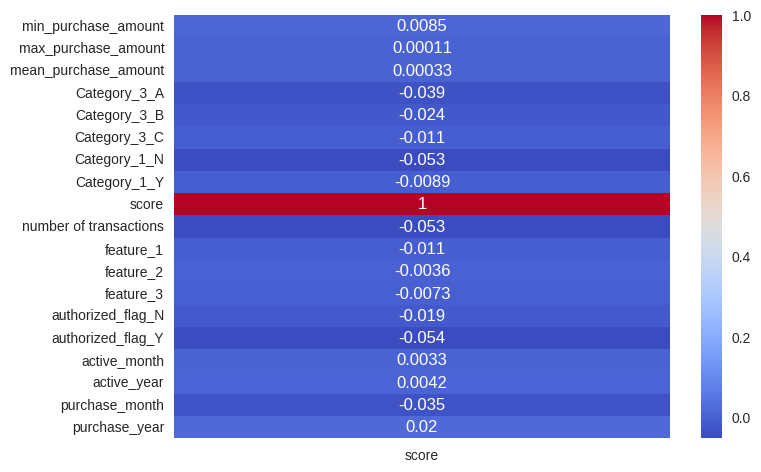

In [ ]:
## correlation with the score
numerical_columns = card_data_final6_df.select_dtypes(include=[np.number, 'bool']).columns.tolist()
correlations = card_data_final6_df[numerical_columns].corr()['score']

# Create a heatmap of the correlation matrix
sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True)


# Show the plot
plt.show()

In [ ]:
card_data_final6_df

,card_id,min_purchase_amount,max_purchase_amount,mean_purchase_amount,Category_3_A,Category_3_B,Category_3_C,Category_1_N,Category_1_Y,score,...,feature_2,feature_3,authorized_flag_N,authorized_flag_Y,first_active_month,active_month,active_year,last_purchase_date,purchase_month,purchase_year
0,C_ID_00007093c1,-0.728876,1.507069,-0.517706,0,127,24,123,28,0.134077,...,1.0,1.0,35,116,2017-02-01,2,2017,2018-04-09 16:23:59,4,2018
1,C_ID_0001506ef0,-0.740491,1.493545,-0.530136,67,1,0,68,0,0.884295,...,2.0,0.0,4,64,2016-07-01,7,2016,2018-03-22 09:14:30,3,2018
2,C_ID_000183fdda,-0.737892,2.764788,-0.486637,5,109,41,151,4,-0.264433,...,1.0,0.0,7,148,2017-09-01,9,2017,2018-04-30 14:59:53,4,2018
3,C_ID_00027503e2,-0.745871,-0.734135,-0.741025,42,0,0,42,0,0.812872,...,1.0,1.0,18,24,2017-05-01,5,2017,2018-01-19 12:07:27,1,2018
4,C_ID_0002c7c2c1,-0.737892,-0.296112,-0.659084,73,0,0,73,0,1.288514,...,2.0,1.0,9,64,2017-04-01,4,2017,2018-03-24 08:43:37,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199705,C_ID_fffeced303,-0.745405,-0.145847,-0.682425,2,179,9,52,138,0.362965,...,1.0,0.0,22,168,2017-04-01,4,2017,2018-04-27 14:54:08,4,2018
199706,C_ID_fffeed3a89,-0.740146,3.758641,-0.513364,7,191,21,202,17,-0.085357,...,3.0,0.0,3,216,2017-11-01,11,2017,2018-04-30 20:26:40,4,2018
199707,C_ID_ffff579d3a,-0.739244,-0.491457,-0.703974,112,3,0,115,0,1.530061,...,2.0,0.0,15,100,2017-08-01,8,2017,2018-03-21 08:55:34,3,2018
199708,C_ID_ffff828181,-0.745405,0.109528,-0.631633,2,173,23,187,11,-0.600063,...,1.0,0.0,24,174,2015-01-01,1,2015,2018-04-29 18:59:29,4,2018


## Regression Analysis

**Hypothesis Test 1: Is there a significant correlation between the max purchase amount and the score?**


**H0: There is no significant correlation between the max purchase amount and the score.**

**H1: There is a significant correlation between the max purchase amount and the score.**

In [ ]:
# I Will use Pearson's correlation coefficient.
max_purchase_amount = card_data_final6_df['max_purchase_amount']
score = card_data_final6_df['score']

corr_coef, p_value = stats.pearsonr(max_purchase_amount, score)

print("Pearson correlation coefficient: ",corr_coef)
print("p-value: ", p_value)

Pearson correlation coefficient:  0.00011059212985538225
p-value:  0.960582897075079


**Assume alpha = 0.05, and since p-value:  0.96 is larger than the significance level, we can't reject the null hypothesis and conclude that there is no significant correlation between the max purchase amount and the score.**

**Hypothesis Test 2: Does the score differ significantly for authorized transactions?**

**H0: The score DO NOT differ significantly for authorized transactions.**

**H1: The score Does differ significantly for authorized transactions.**

In [ ]:
import scipy.stats as stats

authorized_scores = card_data_final6_df['authorized_flag_Y']
score = card_data_final6_df['score']


t_stat, p_value = stats.ttest_ind(authorized_scores, score, equal_var=False)

print("p-value: ", p_value)

p-value:  0.0


**Assume alpha = 0.05, and since p-value: 0.0 is smaller than the significance level, we can reject the null hypothesis and conclude that there is a significant correlation between the authorized_flag_Y and the score.**

## Questions 6-8

In [ ]:
X = card_data_final6_df.drop(['score', 'card_id', 'last_purchase_date', 'first_active_month'], axis=1)
y = card_data_final6_df['score']



**multicollinearity**

<Axes: >

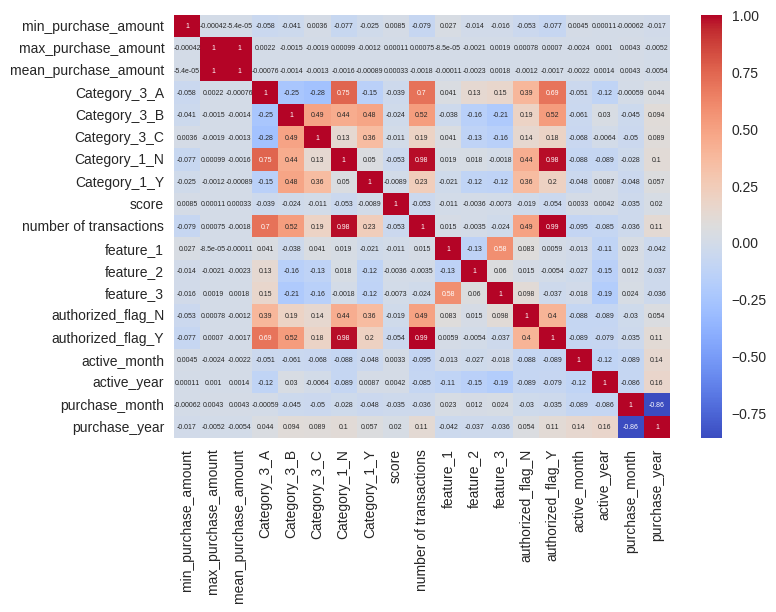

In [ ]:
numerical_columns = card_data_final6_df.select_dtypes(include=[np.number, 'bool']).columns.tolist()
correlations = card_data_final6_df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlations, cmap='coolwarm', annot=True, annot_kws={"fontsize":5})


# Show the plot
plt.show()

In [ ]:
# There are multicollinearity between some features as we can see from the matrix above so we will drop some
X= X.drop(['number of transactions', 'mean_purchase_amount', 'Category_1_N'], axis=1)

<Axes: >

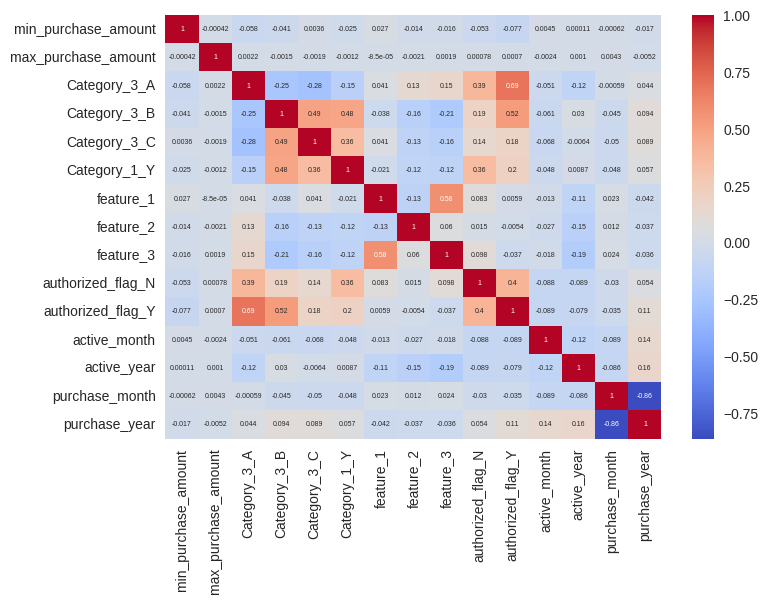

In [ ]:
## correlation with the score
numerical_columns = X.select_dtypes(include=[np.number, 'bool']).columns.tolist()
correlations = X[numerical_columns].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlations, cmap='coolwarm', annot=True, annot_kws={"fontsize":5})


# Show the plot
plt.show()

**after dealing with multicollinearity of some features so i will start working with the model.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("root Mean Squared Error:: ", mse**0.5)

Mean Squared Error:  2.9522419946019878
root Mean Squared Error::  1.7182089496338877


In [ ]:
y_pred_train = lr.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error: ", mse)
print("root Mean Squared Error:: ", mse**0.5)

Mean Squared Error:  2.933409424772467
root Mean Squared Error::  1.7127198909256782


#### From the previous model we got a MSE of 1.7 and it's almost the same for both of training and Test so i belive that the model is good